In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import sys
import os
import itertools

In [4]:
sys.path.append('/home/aalvarez/Work/Projects/Elements/5.8/InstallArea/x86_64-fc30-gcc92-dbg/python/')
sys.path.append('/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/NNPZ/python/')
os.environ['ELEMENTS_AUX_PATH'] = '/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/NNPZ/auxdir/'

In [5]:
from nnpz.photometry.PhotometryProvider import PhotometryProvider

In [6]:
p = PhotometryProvider('/home/aalvarez/Work/Data/WillHartley/RefPhotometriesWithShifts.fits')

In [49]:
filters = ['u', 'g', 'vis', 'H', 'J', 'Y']
d = p.getData(*filters)

In [55]:
shifts = np.arange(-20, 20, 1)
data = np.zeros((len(p.getIds()), len(filters), len(shifts)))

for i, s in enumerate(shifts):
    r = d.photometries(np.asarray([s]*len(filters)))
    data[:, :, i] = r[:, :, 0]

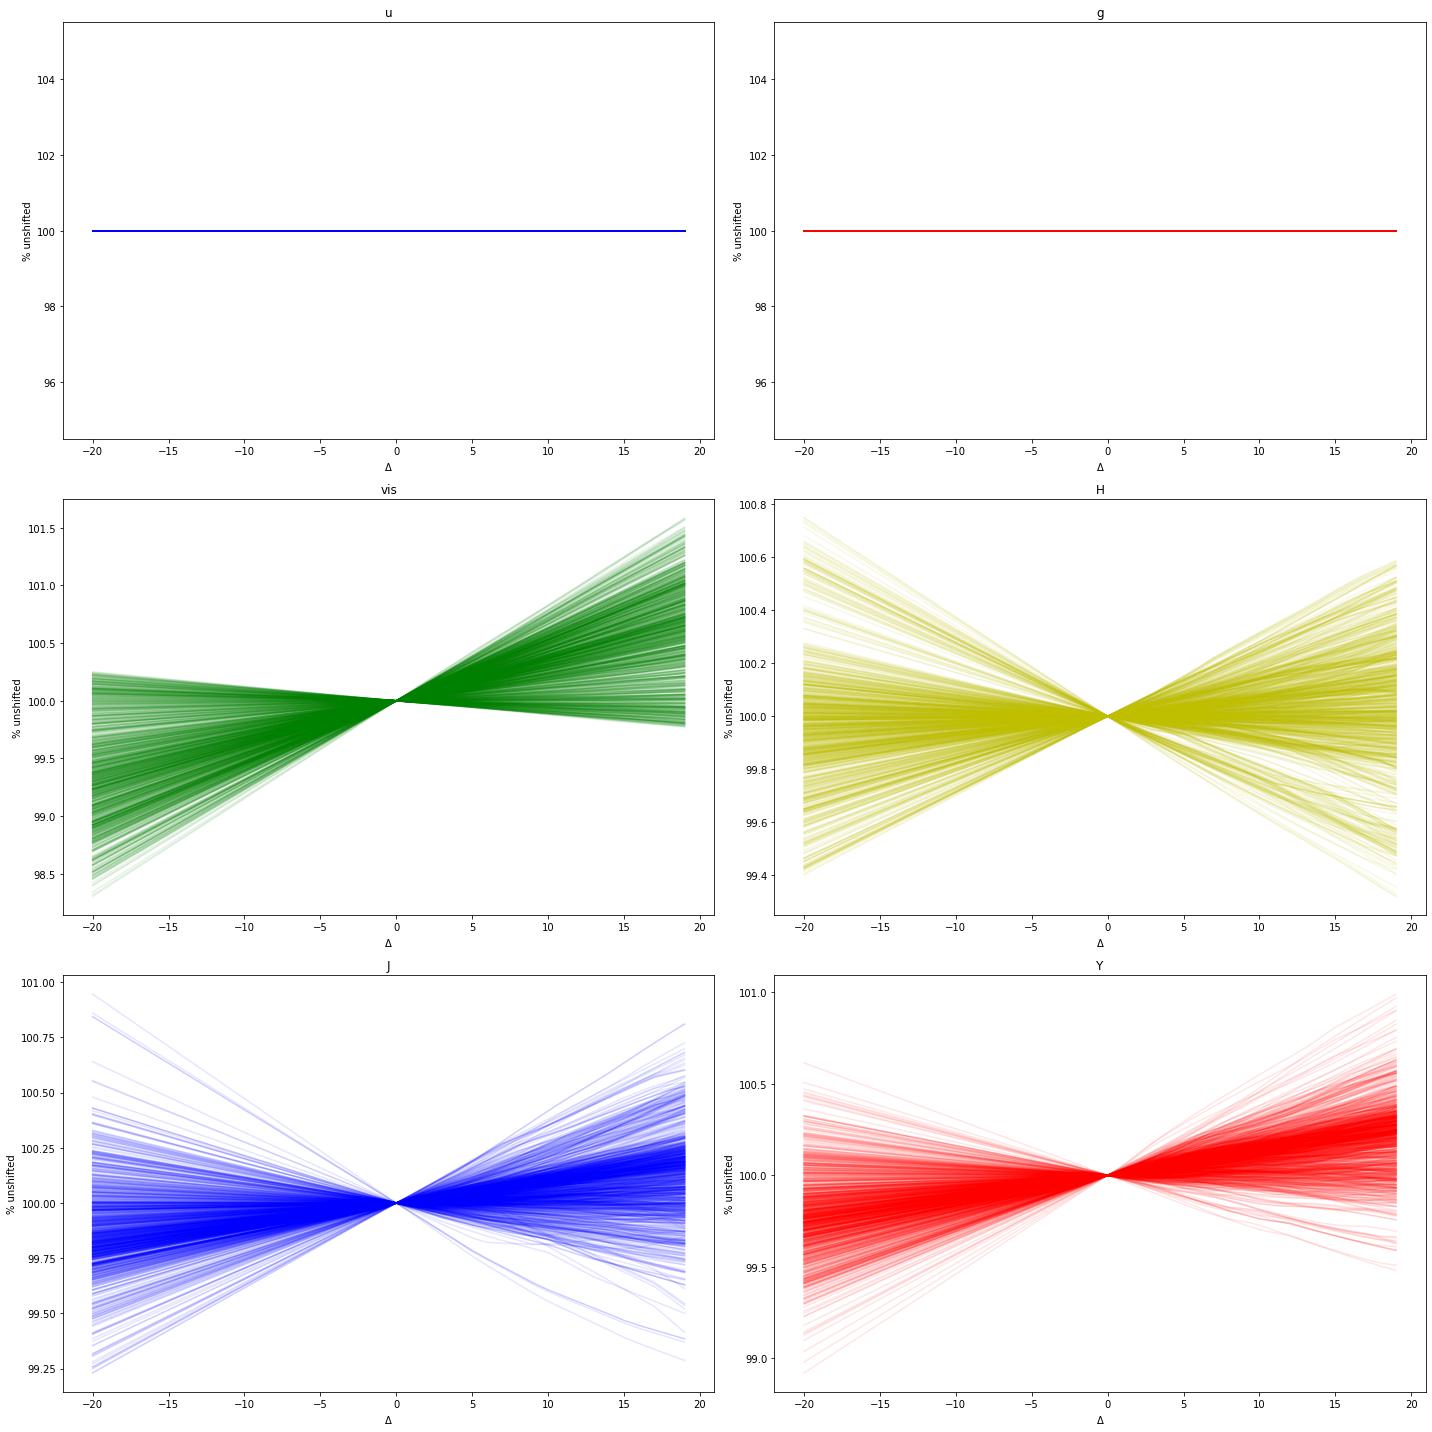

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
axes = axes.ravel()
choices = list(np.random.choice(np.arange(len(data)), 1000))

colors = itertools.cycle(['b', 'r', 'g', 'y'])

for j, f in enumerate(filters):
    axes[j].set_title(f)  
    c = next(colors)
    for i in choices:
        y = data[i, j, :]
        y /= y[len(y)//2]
        axes[j].plot(shifts, y*100., alpha=0.1, c=c)
        axes[j].set_xlabel('$\Delta$')
        axes[j].set_ylabel('% unshifted')

plt.tight_layout()